In [1]:
import numpy as np
import pandas as pd

years = np.array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
enrollment = np.array([460, 475, 465, 482, 491, 498, 521, 534, np.nan])  

data = pd.DataFrame({'Year': years, 'Enrollment': enrollment})

data['SMA'] = data['Enrollment'].rolling(window=3).mean().shift(1).round()

print(data)


   Year  Enrollment    SMA
0  2002       460.0    NaN
1  2003       475.0    NaN
2  2004       465.0    NaN
3  2005       482.0  467.0
4  2006       491.0  474.0
5  2007       498.0  479.0
6  2008       521.0  490.0
7  2009       534.0  503.0
8  2010         NaN  518.0


In [2]:
weights = np.array([1, 2, 3])

def weighted_mov_avg(x, weights):
    return np.sum(x * weights) / np.sum(weights)

data['WMA'] = data['Enrollment'].rolling(window=3).apply(lambda x: weighted_mov_avg(x, weights)).shift(1).round()
print(data)

   Year  Enrollment    SMA    WMA
0  2002       460.0    NaN    NaN
1  2003       475.0    NaN    NaN
2  2004       465.0    NaN    NaN
3  2005       482.0  467.0  468.0
4  2006       491.0  474.0  475.0
5  2007       498.0  479.0  484.0
6  2008       521.0  490.0  493.0
7  2009       534.0  503.0  508.0
8  2010         NaN  518.0  524.0


In [3]:
data['EMA'] = data['Enrollment'].ewm(span=3).mean().shift(1)
print(data)

   Year  Enrollment    SMA    WMA         EMA
0  2002       460.0    NaN    NaN         NaN
1  2003       475.0    NaN    NaN  460.000000
2  2004       465.0    NaN    NaN  470.000000
3  2005       482.0  467.0  468.0  467.142857
4  2006       491.0  474.0  475.0  475.066667
5  2007       498.0  479.0  484.0  483.290323
6  2008       521.0  490.0  493.0  490.761905
7  2009       534.0  503.0  508.0  506.000000
8  2010         NaN  518.0  524.0  520.054902


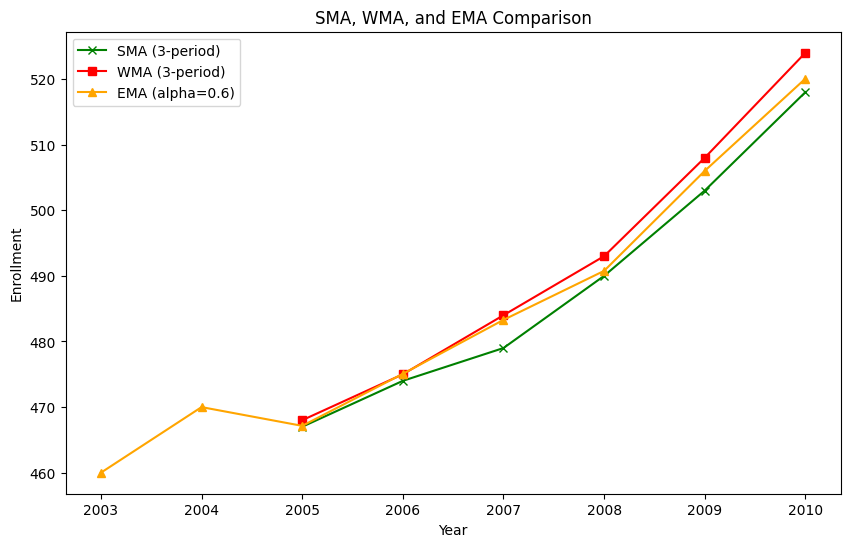

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['SMA'], label='SMA (3-period)', marker='x', linestyle='-', color='green')
plt.plot(data['Year'], data['WMA'], label='WMA (3-period)', marker='s', linestyle='-', color='red')
plt.plot(data['Year'], data['EMA'], label='EMA (alpha=0.6)', marker='^', linestyle='-', color='orange')

plt.title("SMA, WMA, and EMA Comparison")
plt.xlabel("Year")
plt.ylabel("Enrollment")
plt.legend()
plt.show()

In [5]:
def calculate_mse(actual, predicted):
    return ((actual - predicted) ** 2).mean()

mse_sma = calculate_mse(data['Enrollment'].dropna(), data['SMA'].dropna()).round()
mse_wma = calculate_mse(data['Enrollment'].dropna(), data['WMA'].dropna()).round()
mse_ema = calculate_mse(data['Enrollment'].dropna(), data['EMA'].dropna()).round()

print(f"MSE for SMA: {mse_sma}")
print(f"MSE for WMA: {mse_wma}")
print(f"MSE for EMA: {mse_ema}")

MSE for SMA: 559.0
MSE for WMA: 422.0
MSE for EMA: 377.0
